In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns

Data Preprocessing

In [2]:
data = pd.read_csv(r'../data-new/model_data.csv', index_col = 0)

In [3]:
data.head()

,followersCount,followsCount,highlightReelCount,postsCount,med_likes,status,user_digits,full_len,full_characters,full_digits,bio_len,bio_emojis
0,3898.0,753.0,11.0,66.0,172.5,0,0,13,0,0,121,12
2,279.0,763.0,2.0,4.0,3.5,0,0,25,21,0,99,3
3,1268.0,972.0,5.0,255.0,105.5,1,0,14,0,0,118,4
4,207689.0,258.0,10.0,174.0,14238.5,1,0,14,0,0,113,3
5,608419.0,699.0,7.0,363.0,16770.0,1,0,11,0,0,75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 655
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   followersCount      644 non-null    float64
 1   followsCount        644 non-null    float64
 2   highlightReelCount  644 non-null    float64
 3   postsCount          644 non-null    float64
 4   med_likes           526 non-null    float64
 5   status              644 non-null    int64  
 6   user_digits         644 non-null    int64  
 7   full_len            644 non-null    int64  
 8   full_characters     644 non-null    int64  
 9   full_digits         644 non-null    int64  
 10  bio_len             644 non-null    int64  
 11  bio_emojis          644 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 65.4 KB


In [5]:
data = data.fillna(0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X = data.drop(['status'], axis = 1)
y = data['status']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
y_test

643    0
604    1
611    0
295    1
73     0
      ..
282    1
315    0
139    1
536    1
238    0
Name: status, Length: 194, dtype: int64

In [10]:
#fitting scaler to train set
scaler.fit(X_train)

# transforming both the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , precision_score , auc ,confusion_matrix , recall_score, accuracy_score

In [12]:
log_model = LogisticRegression()

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 438 to 104
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   followersCount      450 non-null    float64
 1   followsCount        450 non-null    float64
 2   highlightReelCount  450 non-null    float64
 3   postsCount          450 non-null    float64
 4   med_likes           450 non-null    float64
 5   user_digits         450 non-null    int64  
 6   full_len            450 non-null    int64  
 7   full_characters     450 non-null    int64  
 8   full_digits         450 non-null    int64  
 9   bio_len             450 non-null    int64  
 10  bio_emojis          450 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 42.2 KB


In [14]:
log_model = log_model.fit(X_train , y_train)

c:\Users\HP\Downloads\mybooks\classification-two\spammer-detection\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
log_model_output = log_model.predict(X_test)

Model Evaluation

In [18]:
score_list = [f1_score , precision_score , recall_score , accuracy_score]
def eval_model(score_list, y_true, y_pred):
    results = []
    for score in score_list:
        value = score(y_true, y_pred)
        results.append({"score_name" : score, "value": value})
    return pd.DataFrame(results)

In [19]:
eval_model(score_list, y_test, log_model_output)

,score_name,value
0,<function f1_score at 0x00000119A37A0700>,0.952381
1,<function precision_score at 0x00000119A37A0AF0>,0.930233
2,<function recall_score at 0x00000119A37A0B80>,0.975610
3,<function accuracy_score at 0x00000119A37A03A0>,0.958763


In [20]:
import matplotlib.pyplot as plt

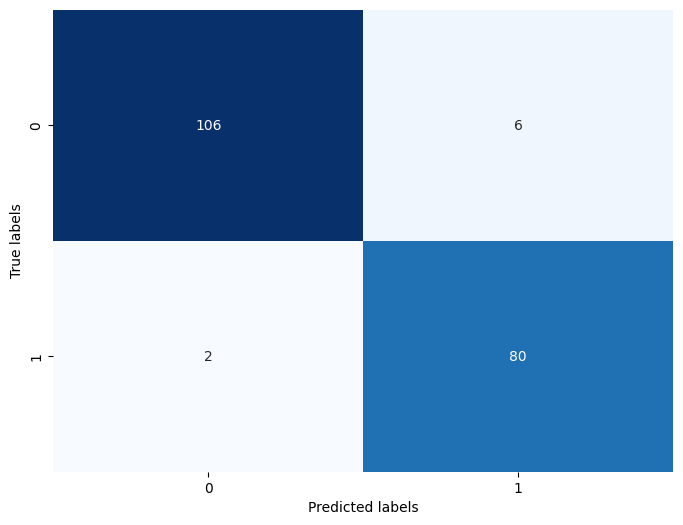

In [21]:
#plotting confusion matrix
cm = confusion_matrix(y_test, log_model_output)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Support Vector Machine

In [25]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model = svc_model.fit(X_train, y_train)

c:\Users\HP\Downloads\mybooks\classification-two\spammer-detection\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
svc_model_output = svc_model.predict(X_test)

In [27]:
eval_model(score_list, y_test, svc_model_output)

,score_name,value
0,<function f1_score at 0x00000119A37A0700>,0.616541
1,<function precision_score at 0x00000119A37A0AF0>,0.445652
2,<function recall_score at 0x00000119A37A0B80>,1.000000
3,<function accuracy_score at 0x00000119A37A03A0>,0.474227


In [29]:
#checking for overfitting and underfitting 
svc_model_train = svc_model.predict(X_train)
eval_model(score_list, y_train, svc_model_train)

,score_name,value
0,<function f1_score at 0x00000119A37A0700>,0.693130
1,<function precision_score at 0x00000119A37A0AF0>,0.532864
2,<function recall_score at 0x00000119A37A0B80>,0.991266
3,<function accuracy_score at 0x00000119A37A03A0>,0.553333


From this evaluation, the train and test data scores are approximately equal. this means that modek simply performed poorly on the dataset. 


In [32]:
#trying SVM with different kernel type
from sklearn.svm import SVC

In [34]:
svc_model_two = SVC()
svc_model_two = svc_model_two.fit(X_train, y_train)
svc_model_two_output = svc_model_two.predict(X_test)

In [35]:
eval_model(score_list, y_test, svc_model_two_output )

,score_name,value
0,<function f1_score at 0x00000119A37A0700>,0.392157
1,<function precision_score at 0x00000119A37A0AF0>,1.000000
2,<function recall_score at 0x00000119A37A0B80>,0.243902
3,<function accuracy_score at 0x00000119A37A03A0>,0.680412


Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model = naive_model.fit(X_train, y_train)
naive_model_output = naive_model.predict(X_test)

In [37]:
eval_model(score_list, y_test, naive_model_output)

,score_name,value
0,<function f1_score at 0x00000119A37A0700>,0.616667
1,<function precision_score at 0x00000119A37A0AF0>,0.973684
2,<function recall_score at 0x00000119A37A0B80>,0.451220
3,<function accuracy_score at 0x00000119A37A03A0>,0.762887


Out of the models built, teh Logistic regression model is the best performing.

In [38]:
import joblib
joblib.dump(log_model, '../models/final_model.pkl')

['../models/final_model.pkl']